Importing the Dependencies

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data collection and processing

In [8]:
#Load the dataset into dataframe
car_dataset = pd.read_csv('/content/car data.csv')

In [9]:
#checking the 1st 5 rows of the dataset
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
#checking the number of rows and column
car_dataset.shape

(301, 9)

In [12]:
#getting the infromation of the datset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [15]:
#checking the number of missing values
car_dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [18]:
#checking the distribution of catogarical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding the categorical data

In [42]:
#encoding fuel_type column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1, "CNG":2}}, inplace = True)
car_dataset.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace = True)
car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace = True)

<ipython-input-42-41e36eb967c3>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace = True)


In [43]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the dataset into data and target

In [44]:
x=car_dataset.drop(['Car_Name','Selling_Price'], axis=1)
y=car_dataset['Selling_Price']

splitting the data into train and test

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=2)

Model training --> Linear regression model

In [46]:
#loading the linear regression model
lin_reg=LinearRegression()

In [47]:
#train the model with dataset
lin_reg.fit(x_train, y_train)

LinearRegression()

Model Evaluation

In [51]:
#prediction on training data
training_data_prediction = lin_reg.predict(x_train)

In [52]:
# R squared error
error_square = metrics.r2_score(y_train, training_data_prediction)
print("R squared error : ",error_square)

R squared error :  0.8799451660493711


vishualizing the actual price and predicted price

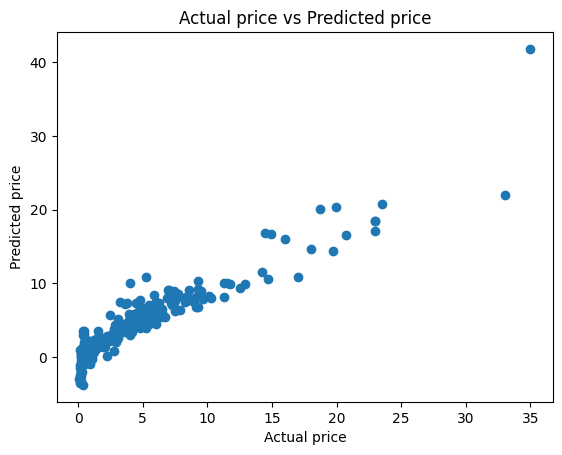

In [53]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price vs Predicted price")
plt.show()

In [54]:
#prediction on test dataset
test_data_prediction = lin_reg.predict(x_test)


In [55]:
#calculating r squared error
squared_error = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ",squared_error)

R squared error :  0.8365766715027051


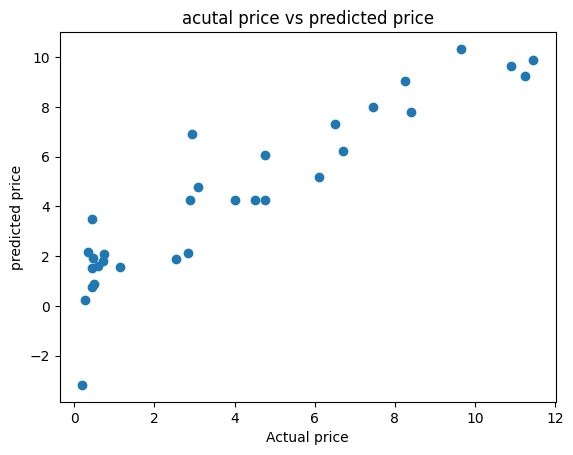

In [56]:
#visualizing the actual price vs predicted price
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("predicted price")
plt.title("acutal price vs predicted price")
plt.show()

Model training --> Lasso regression

In [57]:
#loading the lasso regression model
lass_reg=Lasso()

In [58]:
#traing the model
lass_reg.fit(x_train, y_train)

Lasso()

Model evaluation

In [59]:
#evaluation on training dataset
training_data_prediction = lass_reg.predict(x_train)


In [60]:
#calculation of r squared error
squared_error = metrics.r2_score(y_train, training_data_prediction)
print("R squared error value : ", squared_error)


R squared error value :  0.8427856123435794


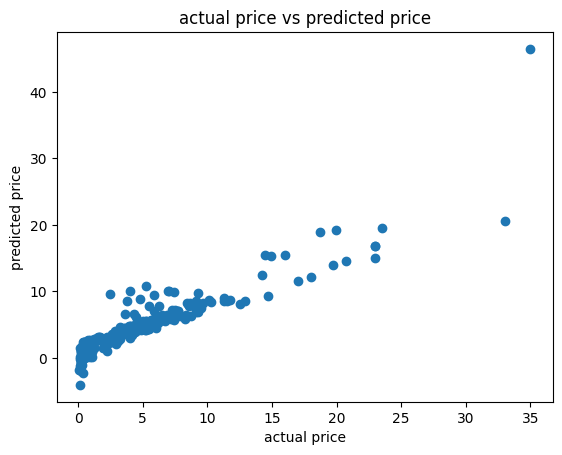

In [61]:
#visualizing the actual price and predicted price
plt.scatter(y_train, training_data_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual price vs predicted price")
plt.show()

In [62]:
#evaluation on test dataset
test_data_prediction = lass_reg.predict(x_test)


In [63]:
#calculation of r squared error
squared_error = metrics.r2_score(y_test, test_data_prediction)
print("R squared error value : ", squared_error)


R squared error value :  0.8709167941173195


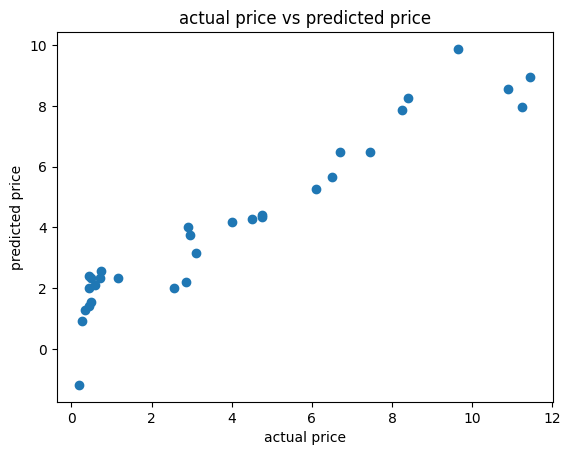

In [64]:
#visualizing the actual price and predicted price
plt.scatter(y_test, test_data_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual price vs predicted price")
plt.show()